In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
## check missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

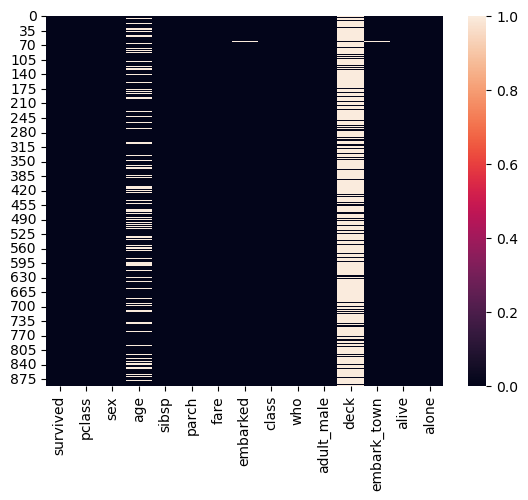

In [8]:
sns.heatmap(df.isnull())

## Handling missing values by deleting rows

In [10]:
# rowwise deletion
df.dropna().shape

(182, 15)

In [11]:
df.shape

(891, 15)

## Imputation Technqiues
## 1-Mean Value Imputation

/tmp/ipykernel_364/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

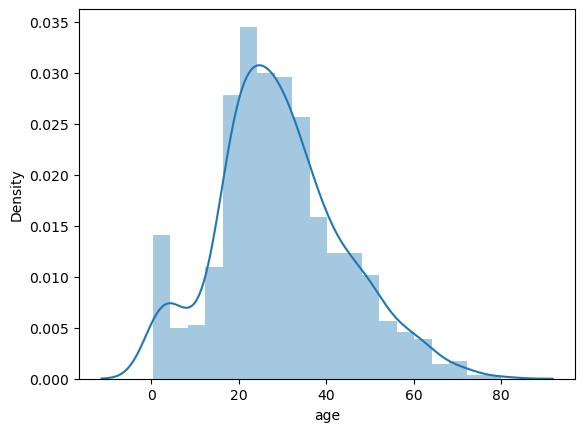

In [13]:
sns.distplot(df['age'])

In [14]:
df.age.isnull().sum()

177

In [15]:
df["Age_mean"]=df["age"].fillna(df['age'].mean())

In [16]:
df[["Age_mean","age"]]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


## this technique workswell when your data is normally distributed

## 2-median value impuation
if you have outliers in dataset use this technique

In [17]:
df["Age_median"]=df["age"].fillna(df["age"].median())

In [21]:
df[["Age_median","Age_mean","age"]]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


## 3- Mode values Impuation--useful for categorical

In [24]:
df[df["embarked"].isnull()]	

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [25]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df[df["age"].notna()]["embarked"].mode()[0]

'S'

In [31]:
mode=df[df["age"].notna()]["embarked"].mode()[0]

In [32]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [34]:
df[["embarked_mode","embarked"]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [36]:
df['embarked_mode'].isnull().sum()

0

# Handling Imbalanced Dataset
  1.Upsampling -------    2.Downsampling

In [1]:
import numpy as np
import pandas as pd

In [3]:
# Set the random seed for reproducibility
np.random.seed(123)

# create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0 =int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
n_class_0,n_class_1

(900, 100)

In [5]:
class_0 =pd.DataFrame({
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target' :   [0] * n_class_0
    
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target' :   [1] * n_class_1
    
})
    

In [8]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [9]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [10]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

## Upsampling

In [11]:
df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [12]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [13]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [14]:
## Upsampling perform
from sklearn.utils import resample

In [19]:
df_minority_upsample=resample(df_minority,
                              replace=True, # sample with replacement
                              n_samples=len(df_majority), # to match the majority class
                              random_state=42
                             )

In [21]:
df_minority_upsample.shape

(900, 3)

In [23]:
df_minority_upsample["target"].value_counts()

1    900
Name: target, dtype: int64

In [27]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [28]:
df_upsamled["target"].value_counts()

0    900
1    900
Name: target, dtype: int64

In [29]:
df_upsampled.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [30]:
df_upsampled.tail()

,feature_1,feature_2,target
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1
974,1.160887,2.489203,1


In [31]:
df_upsampled.shape

(1800, 3)

## Downsampling

In [32]:
df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [33]:
df_majority_downsample=resample(df_majority,
                              replace=False, # sample with replacement
                              n_samples=len(df_minority), # to match the minority class
                              random_state=42
                             )

In [34]:
df_majority_downsample.shape

(100, 3)

In [38]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [41]:
df_downsample["target"].value_counts()

1    100
0    100
Name: target, dtype: int64

## SMOTE(Synthetic MInority Oversampling Technique)

In [1]:
from sklearn.datasets import make_classification

In [4]:
# x independent features
# y dependent  features
x,y=make_classification(n_samples=1000, n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)


In [9]:
import pandas as pd
df1=pd.DataFrame(x,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
final_df=pd.concat([df1,df2],axis=1)

In [10]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [13]:
final_df["target"].value_counts()

0    894
1    106
Name: target, dtype: int64

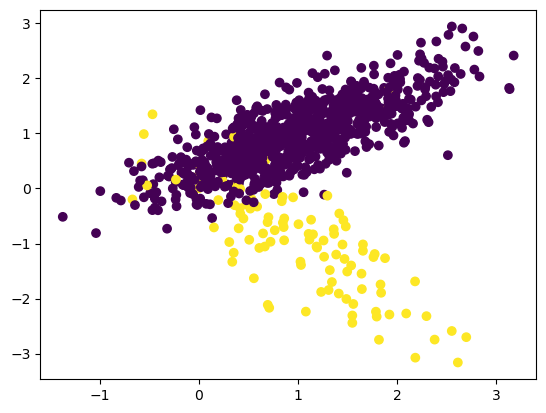

In [14]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"],c=final_df["target"])

In [15]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 9.4 MB/s eta 0:00:00


In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
## transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])

In [18]:
x.shape

(1788, 2)

In [19]:
y.shape

(1788,)

In [23]:
len(y[y==0])

894

In [24]:
len(y[y==1])

894

In [25]:
df1=pd.DataFrame(x,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
overampled_df=pd.concat([df1,df2],axis=1)

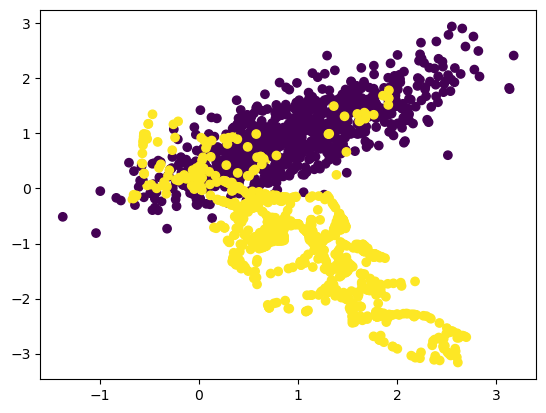

In [26]:
plt.scatter(overampled_df["f1"],overampled_df["f2"],c=overampled_df["target"])

## Data Interpolation

## 1. Linear Interploation

In [1]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])


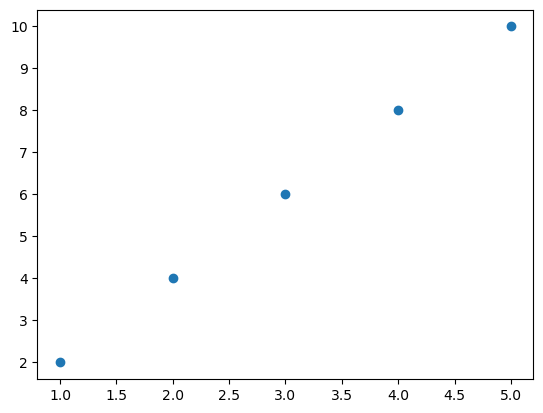

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [3]:
## Interpolation the data using linear interpolation
x_new=np.linspace(1,5,10) ## create new x values 
y_interp=np.interp(x_new,x,y) ## Interplate y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


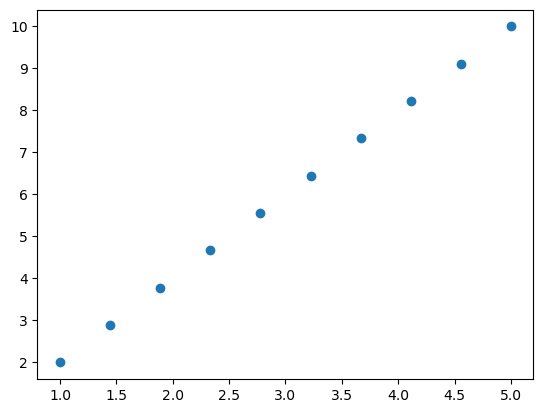

In [4]:
plt.scatter(x_new,y_interp)

## Cubic Interpolation with scipy

In [5]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])


In [7]:
from scipy.interpolate import interp1d

In [8]:
## create a cubic interpolation function
f=interp1d(x,y,kind="cubic")

In [10]:
# interpolate the data
x_new=np.linspace(1,5,10)
y_interp=f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


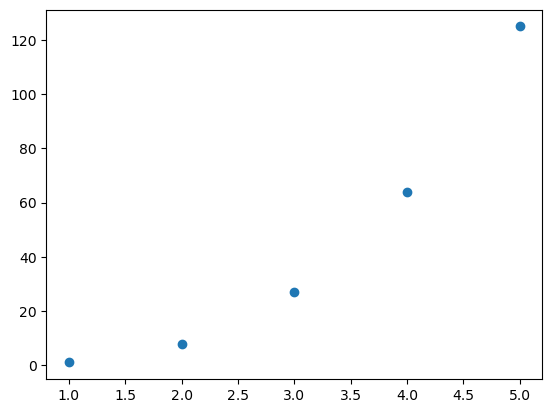

In [12]:
plt.scatter(x,y)

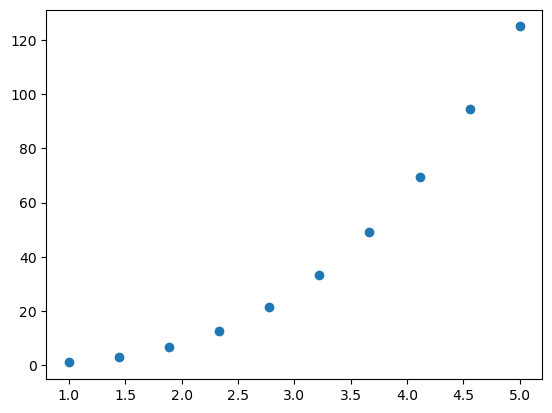

In [13]:
plt.scatter(x_new,y_interp)

## ploynomial interpolation

In [14]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])


In [17]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)   ## fit a 2nd degree polynomial to the data


In [18]:
x_new=np.linspace(1,5,10) ## create new x values
y_interp=np.polyval(p,x_new) # interpolation y values

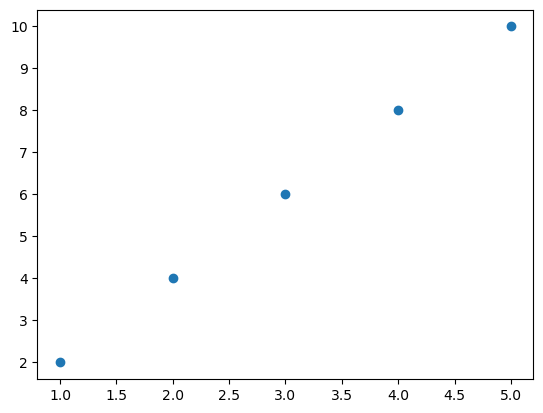

In [20]:
plt.scatter(x,y)

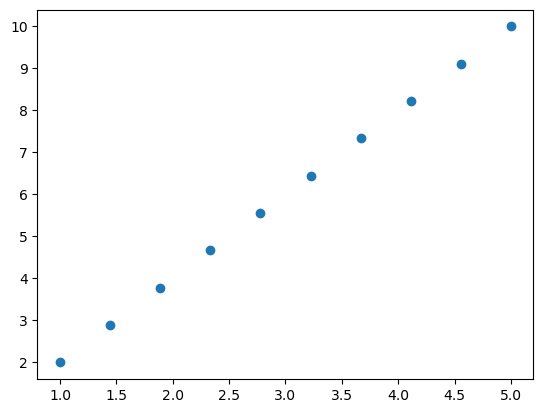

In [19]:
plt.scatter(x_new,y_interp)

## Handling Outliers

## 5 number Summary
# 1.Minimum value  
# 2.Q1-25 percentile
# 3.Median
# 4.Q3-75 percentile
# 5.Maximum

In [22]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,58,98,78,52,11,1000,1200]

In [23]:
np.percentile(lst_marks,[25])

array([52.])

In [24]:
np.percentile(lst_marks,[75])

array([89.])

In [25]:
np.percentile(lst_marks,[100])

array([1200.])

In [26]:
np.percentile(lst_marks,[0])

array([11.])

In [32]:
## [lowern Fence<-----> Higher Fence]
Q1=np.percentile(lst_marks,[25])
print(Q1)

[52.]


In [33]:
minium,Q1,Q2,Q3,Maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [34]:
Maximum

1200.0

In [36]:
IQR=Q3-Q1
print(IQR)

37.0


In [37]:
lower_fence=Q1-1.5*(IQR)
Higher_fence=Q3+1.5*(IQR)

In [38]:
lower_fence,Higher_fence

(-3.5, 144.5)

In [41]:
outliers=[]
for i in lst_marks:
    if i>=0.75 and i<=142.75:
        print("This is element is not as outlier")
    else:
        outliers.append(i)

This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier
This is element is not as outlier


In [42]:
outliers

[1000, 1200]

In [ ]:
import seaborn as s